In [8]:
import os
import pandas as pd

path = './datas/'
lis = os.listdir(path=path)
lis

['20161225_20211225浙江农业.xlsx',
 '20161225_20211225浙江商务服务业.xlsx',
 '20161225_20211225浙江建筑业.xlsx',
 '20161225_20211225浙江批发零售业.xlsx',
 '20161225_20211225浙江省制造业.xlsx',
 '20161225_20211225浙江酒店与技术服务业.xlsx',
 '20161225_20211225浙江采矿业.xlsx',
 '20161225_20211225浙江金融科技业.xlsx']

In [6]:
# import re
# df = pd.DataFrame()
# for name in list[8:10]:
#     print(name)
#     df_datas = pd.read_excel(path+name)['pct_chg'].to_list()
#     co_name = re.findall('浙江(.*?).', name)[0]
#     df[co_name] = df_datas
# print(df)

In [28]:
import pandas as pd
import re

# dfs = pd.DataFrame()

for names in lis:
    print(names)
    df = pd.read_excel('./datas/' + names)
    grouped = df.groupby('ts_code')
    df2 = grouped.get_group(df.iloc[0, 0])[['trade_date']]
    if lis.index(names) == 0:
        global dfs
        dfs = df2
    # df2 = pd.DataFrame()


    for name,group in grouped:
        print(name)
        df3 = group.loc[:,('trade_date','pct_chg')]
        df3 = df3.rename(columns={'pct_chg': name})
        df3 = df3[['trade_date',name]]
        # if len(df3) == len(df2):
        df2 = pd.merge(df2,df3,on='trade_date',how="outer")
    # df2.dropna(axis=1,how='any',).to_csv('./view.csv',index=False)
    df2=df2.dropna(axis=1,how='any',)
    col_name = re.findall('浙江(.*?).xlsx', names)[0]
    df2[col_name] = df2.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

    dfs = pd.merge(dfs,df2.iloc[:,[0,-1]],on='trade_date',how="outer")
# dfs.to_csv('testt.csv')
dfs.to_csv('test.csv',index=False)

20161225_20211225浙江农业.xlsx
002124.SZ
002515.SZ
002840.SZ
003030.SZ
300673.SZ
605077.SH
20161225_20211225浙江商务服务业.xlsx
002010.SZ
002103.SZ
002115.SZ
002188.SZ
002344.SZ
002712.SZ
300795.SZ
600113.SH
600415.SH
600790.SH
20161225_20211225浙江建筑业.xlsx
002061.SZ
002062.SZ
002375.SZ
002586.SZ
002761.SZ
300649.SZ
600491.SH
600512.SH
601789.SH
603316.SH
603388.SH
603637.SH
605303.SH
20161225_20211225浙江批发零售业.xlsx
000411.SZ
000705.SZ
000906.SZ
000963.SZ
002280.SZ
002758.SZ
300945.SZ
600051.SH
600387.SH
600704.SH
600814.SH
600857.SH
600865.SH
601116.SH
605056.SH
20161225_20211225浙江省制造业.xlsx
000559.SZ
000739.SZ
000913.SZ
000925.SZ
000980.SZ
002001.SZ
002006.SZ
002011.SZ
002019.SZ
002020.SZ
002021.SZ
002048.SZ
002050.SZ
002056.SZ
002064.SZ
002082.SZ
002085.SZ
002099.SZ
002112.SZ
002119.SZ
002122.SZ
002126.SZ
002164.SZ
002196.SZ
002199.SZ
002206.SZ
002214.SZ
002236.SZ
002250.SZ
002273.SZ
002276.SZ
002284.SZ
002326.SZ
002332.SZ
002364.SZ
002370.SZ
002389.SZ
002415.SZ
002418.SZ
002427.SZ
002430.SZ
002434

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./test.csv').iloc[:,2:]

df.columns=['nong', 'fuwu', 'jianzu', 'pifalingshou', 'zhizhaoye','jiudianyujisufuwu','caikuang','jinrongkeji']
df

,nong,fuwu,jianzu,pifalingshou,zhizhaoye,jiudianyujisufuwu,caikuang,jinrongkeji
0,-0.09295,-0.127683,-2.025350,2.851514,-1.781049,-3.6906,-4.2893,-1.828826
1,-1.42655,-0.912567,-1.530850,-2.011457,0.404621,-1.7434,-3.1401,-0.525409
2,2.46700,-0.035417,-1.148600,0.492243,0.701805,-0.1393,-0.4808,1.294900
3,3.01645,2.274033,2.432900,0.790471,1.282036,1.3409,1.9608,1.788197
4,-1.45460,-0.407250,0.256225,0.738029,-1.222241,-7.0210,-4.2254,-2.443044
...,...,...,...,...,...,...,...,...
724,-1.70865,-0.293767,-1.193488,-2.274243,-0.532601,1.4708,1.7890,-0.281282
725,1.39480,0.003233,-0.238862,-0.047714,-0.142462,-4.7719,-0.2439,-0.327815
726,-3.22235,-1.373667,-2.236963,-1.610757,-1.277872,-6.8150,-3.2938,-0.347076
727,-1.86785,0.533633,-0.290888,0.220100,-0.176662,0.8285,0.7105,-0.773368


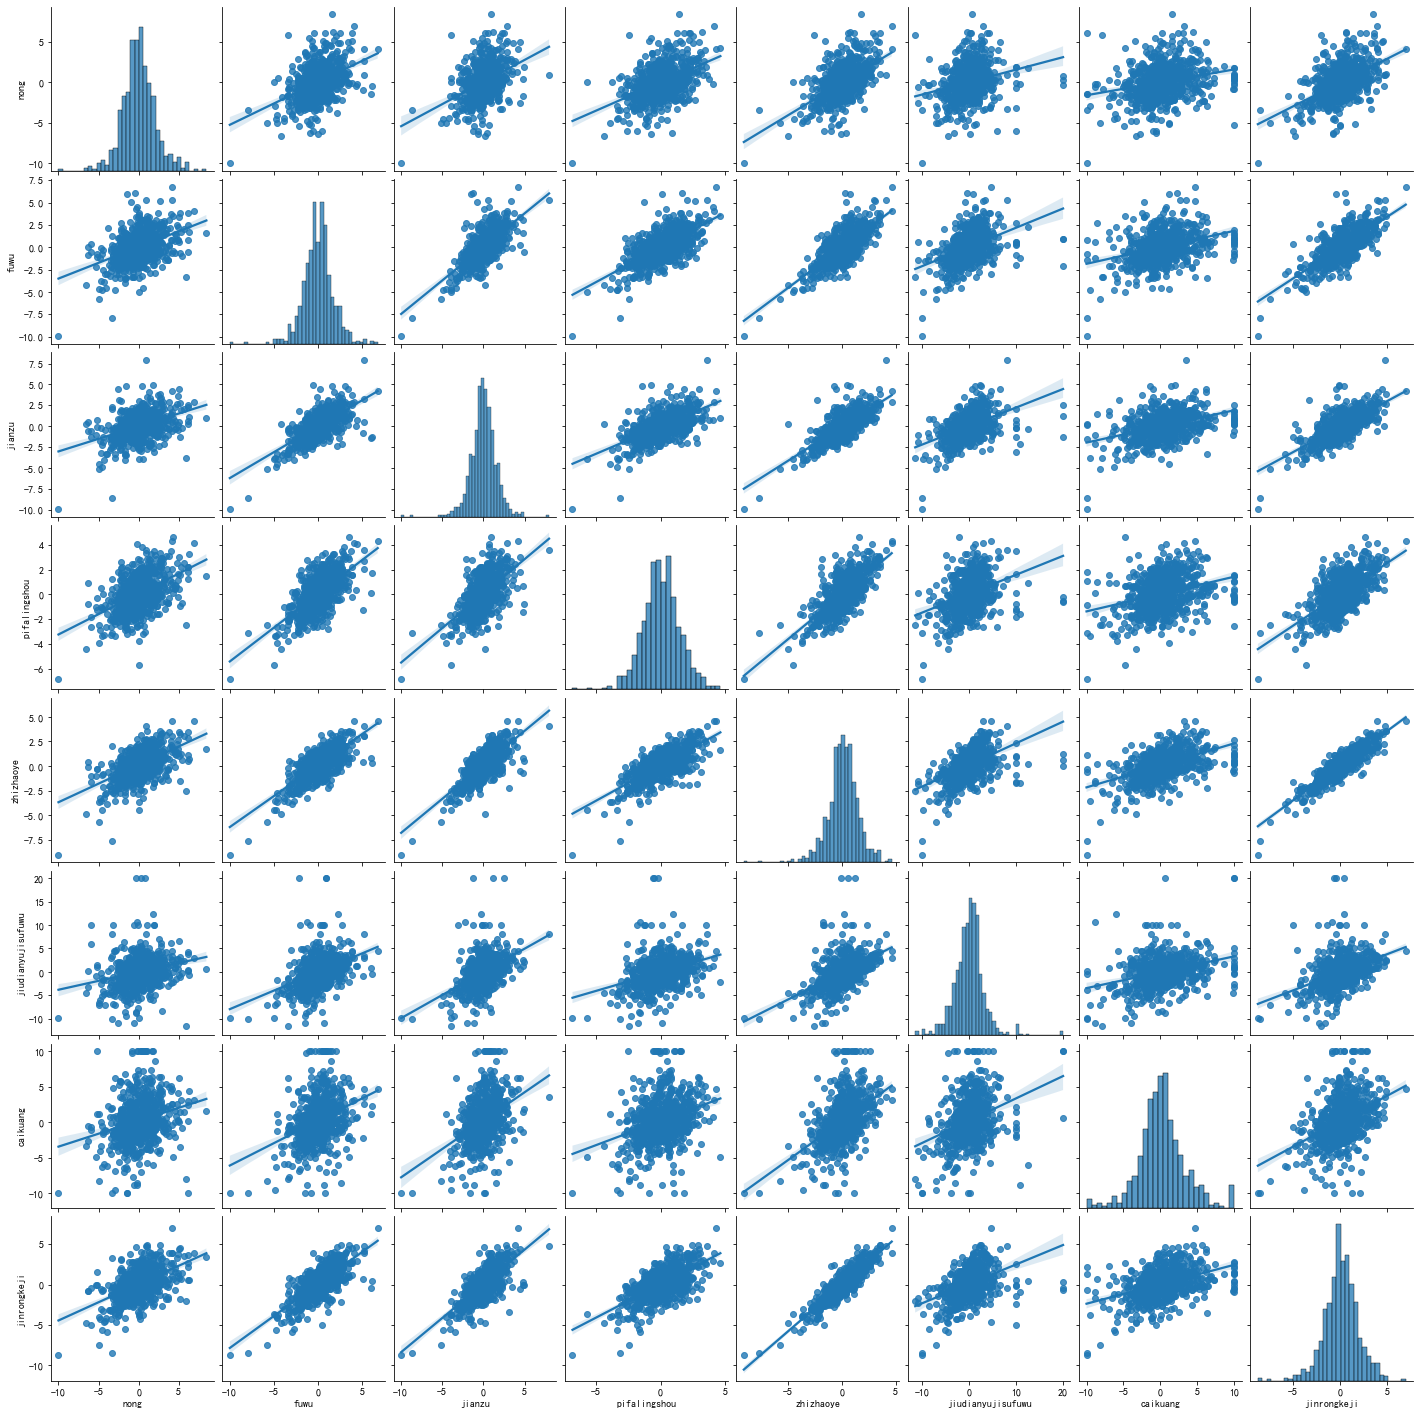

In [46]:
sns.pairplot(data=df, kind='reg', diag_kind='hist')
plt.savefig('1.jpg')
plt.show()

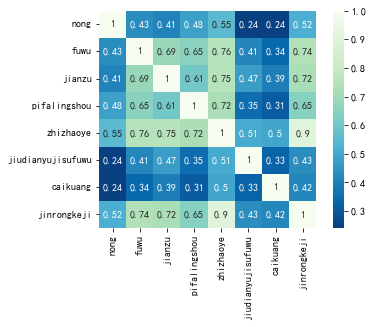

In [47]:
# 相关度
corr = df.corr()
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)
plt.savefig('2.jpg')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              zhizhaoye   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3280.
Date:                Fri, 14 Jan 2022   Prob (F-statistic):          1.17e-271
Time:                        14:17:11   Log-Likelihood:                -671.04
No. Observations:                 729   AIC:                             1346.
Df Residuals:                     727   BIC:                             1355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0505      0.023      2.240      

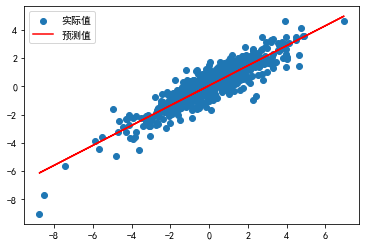

In [45]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

y = df.iloc[:, 4] # 因变量为第 2 列数据
x = df.iloc[:, 7] # 自变量为第 3 列数据
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

# 画图
# 这两行代码在画图时添加中文必须用
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

predicts = model.predict() # 模型的预测值
x = df.iloc[:, 7] # 自变量为第 3 列数据
plt.scatter(x, y, label='实际值') # 散点图
plt.plot(x, predicts, color = 'red', label='预测值')
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


y = df.iloc[:, 4] # 因变量为第 2 列数据
x = df.iloc[:, [1,2,3,7]] # 自变量为第 3 列数据
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:              zhizhaoye   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1153.
Date:                Fri, 14 Jan 2022   Prob (F-statistic):          3.25e-312
Time:                        14:16:41   Log-Likelihood:                -565.19
No. Observations:                 729   AIC:                             1140.
Df Residuals:                     724   BIC:                             1163.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0540      0.020      2.761   